Import the Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np

Read the Data using Pandas

In [ ]:
df_heart = pd.read_csv('/content/sample_data/heart_2022_with_nans.csv')
df_heart

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

To check the data for missing values

In [ ]:
df_heart.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

To categorise some column into integers, it is vital to ensure that greater numbers are used for the best and lesser numbers for the worst especially with health synarios

In [ ]:
df_heart['GeneralHealth'].unique()

array(['Very good', 'Excellent', 'Fair', 'Poor', 'Good', nan],
      dtype=object)

In [ ]:
df_heart['GeneralHealth'].replace({'Very good': 4, 'Excellent' : 5, 'Good':3, 'Fair':2, 'Poor':1}, inplace=True)

In [ ]:
df_heart['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)', nan,
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago'], dtype=object)

In [ ]:
df_heart['LastCheckupTime'] = df_heart['LastCheckupTime'].replace({"5 or more years ago":4, 'Within past 5 years (2 years but less than 5 years ago)':3, 'Within past 2 years (1 year but less than 2 years ago)':2, 'Within past year (anytime less than 12 months ago)':1})

In [ ]:
df_heart['RemovedTeeth'].unique()

array([nan, 'None of them', '1 to 5', '6 or more, but not all', 'All'],
      dtype=object)

In [ ]:
df_heart['RemovedTeeth'].replace({'None of them':1, '1 to 5':2, '6 or more, but not all':3, 'All':4}, inplace=True)

In [ ]:
df_heart['HadHeartAttack'].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
df_heart['HadHeartAttack'].replace({'Yes':1, 'No':0}, inplace=True)

To deal with the missing values, the method drop na is employed because it doesn't make sense to just replace health record with any value. We will just deal with only completed dataset

In [ ]:
df_heart.dropna(axis=0, inplace=True)

In [ ]:
df_heart['HadAngina'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadStroke'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadAsthma'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadSkinCancer'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadCOPD'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadDepressiveDisorder'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadKidneyDisease'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadArthritis'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['HadDiabetes'].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
df_heart['HadDiabetes'].unique()

array([0, 1, 'Yes, but only during pregnancy (female)',
       'No, pre-diabetes or borderline diabetes'], dtype=object)

In [ ]:
df_heart['HadDiabetes'].replace({'Yes, but only during pregnancy (female)':2, 'No, pre-diabetes or borderline diabetes':0}, inplace=True)

In [ ]:
df_heart['PhysicalActivities'].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
df_heart['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
df_heart['DeafOrHardOfHearing'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['BlindOrVisionDifficulty'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['DifficultyConcentrating'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['DifficultyWalking'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['DifficultyDressingBathing'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['DifficultyErrands'].replace({'Yes':1, 'No':0}, inplace=True)
df_heart['SmokerStatus'].replace({'Former smoker':1, 'Never smoked':0, 'Current smoker - now smokes some days':2, 'Current smoker - now smokes every day':3}, inplace=True)
df_heart['ECigaretteUsage'].replace({'Use them some days':1, 'Never used e-cigarettes in my entire life':0, 'Not at all (right now)':2, 'Use them every day':3}, inplace=True)
df_heart['ChestScan'].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
df_heart['RaceEthnicityCategory']=lb.fit_transform(df_heart['RaceEthnicityCategory'])
df_heart['AgeCategory']=lb.fit_transform(df_heart['AgeCategory'])
df_heart['AlcoholDrinkers']=lb.fit_transform(df_heart['AlcoholDrinkers'])
df_heart['HIVTesting']=lb.fit_transform(df_heart['HIVTesting'])
df_heart['FluVaxLast12']=lb.fit_transform(df_heart['FluVaxLast12'])
df_heart['PneumoVaxEver']=lb.fit_transform(df_heart['PneumoVaxEver'])
df_heart['TetanusLast10Tdap']=lb.fit_transform(df_heart['TetanusLast10Tdap'])
df_heart['HighRiskLastYear']=lb.fit_transform(df_heart['HighRiskLastYear'])
df_heart['CovidPos']=lb.fit_transform(df_heart['CovidPos'])

In [ ]:
df_heart['State'] = lb.fit_transform(df_heart['State'])
df_heart['Sex'] = lb.fit_transform(df_heart['Sex'])

The dataset is completely clean and properly encoded now

In [ ]:
df_heart.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [ ]:
df_heart.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

Export the clean data into csv file

In [ ]:
df_heart.to_csv('cleanheartdata.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([127811.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 118211.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

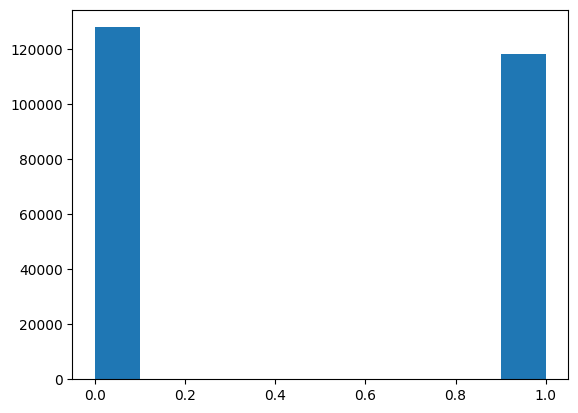

In [ ]:
plt.hist(df_heart['Sex'])

In [ ]:
df_heart["HadHeartAttack"].value_counts()

0.0    232587
1.0     13435
Name: HadHeartAttack, dtype: int64

([<matplotlib.patches.Wedge at 0x7d20f681ed70>,
 [Text(-1.083851786378223, 0.1877905885946764, '0.0'),
  Text(1.083851784180445, -0.18779060127936784, '1.0')])

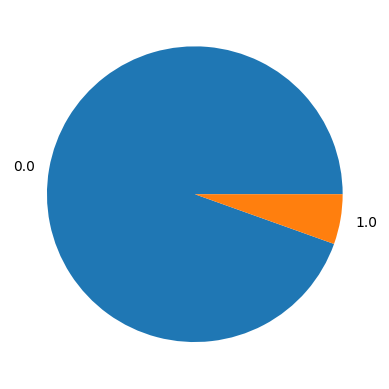

In [ ]:
pielabel = df_heart["HadHeartAttack"].unique()
plt.pie(df_heart["HadHeartAttack"].value_counts(), labels=pielabel)

This is an imbalance dataset and training our model with such will lead to algorithm bias. However, before this, it is vital to check each column and standardize some columns

In [ ]:
df_heart.iloc[0]

State                         0.00
Sex                           0.00
GeneralHealth                 4.00
PhysicalHealthDays            4.00
MentalHealthDays              0.00
LastCheckupTime               1.00
PhysicalActivities            1.00
SleepHours                    9.00
RemovedTeeth                  1.00
HadHeartAttack                0.00
HadAngina                     0.00
HadStroke                     0.00
HadAsthma                     0.00
HadSkinCancer                 0.00
HadCOPD                       0.00
HadDepressiveDisorder         0.00
HadKidneyDisease              0.00
HadArthritis                  1.00
HadDiabetes                   0.00
DeafOrHardOfHearing           0.00
BlindOrVisionDifficulty       0.00
DifficultyConcentrating       0.00
DifficultyWalking             0.00
DifficultyDressingBathing     0.00
DifficultyErrands             0.00
SmokerStatus                  1.00
ECigaretteUsage               0.00
ChestScan                     0.00
RaceEthnicityCategor

The BMI and Weight column has high values that may need us to standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_heart[['BMI', 'WeightInKilograms']] = sc.fit_transform(df_heart[['BMI', 'WeightInKilograms']])


In [ ]:
df_heart.iloc[0]

State                        0.000000
Sex                          0.000000
GeneralHealth                4.000000
PhysicalHealthDays           4.000000
MentalHealthDays             0.000000
LastCheckupTime              1.000000
PhysicalActivities           1.000000
SleepHours                   9.000000
RemovedTeeth                 1.000000
HadHeartAttack               0.000000
HadAngina                    0.000000
HadStroke                    0.000000
HadAsthma                    0.000000
HadSkinCancer                0.000000
HadCOPD                      0.000000
HadDepressiveDisorder        0.000000
HadKidneyDisease             0.000000
HadArthritis                 1.000000
HadDiabetes                  0.000000
DeafOrHardOfHearing          0.000000
BlindOrVisionDifficulty      0.000000
DifficultyConcentrating      0.000000
DifficultyWalking            0.000000
DifficultyDressingBathing    0.000000
DifficultyErrands            0.000000
SmokerStatus                 1.000000
ECigaretteUs

We also need to check the data for duplicate

In [ ]:
df_heart.duplicated().sum()

10

In [ ]:
df_heart.drop_duplicates(inplace=True)

In [ ]:
sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 16)

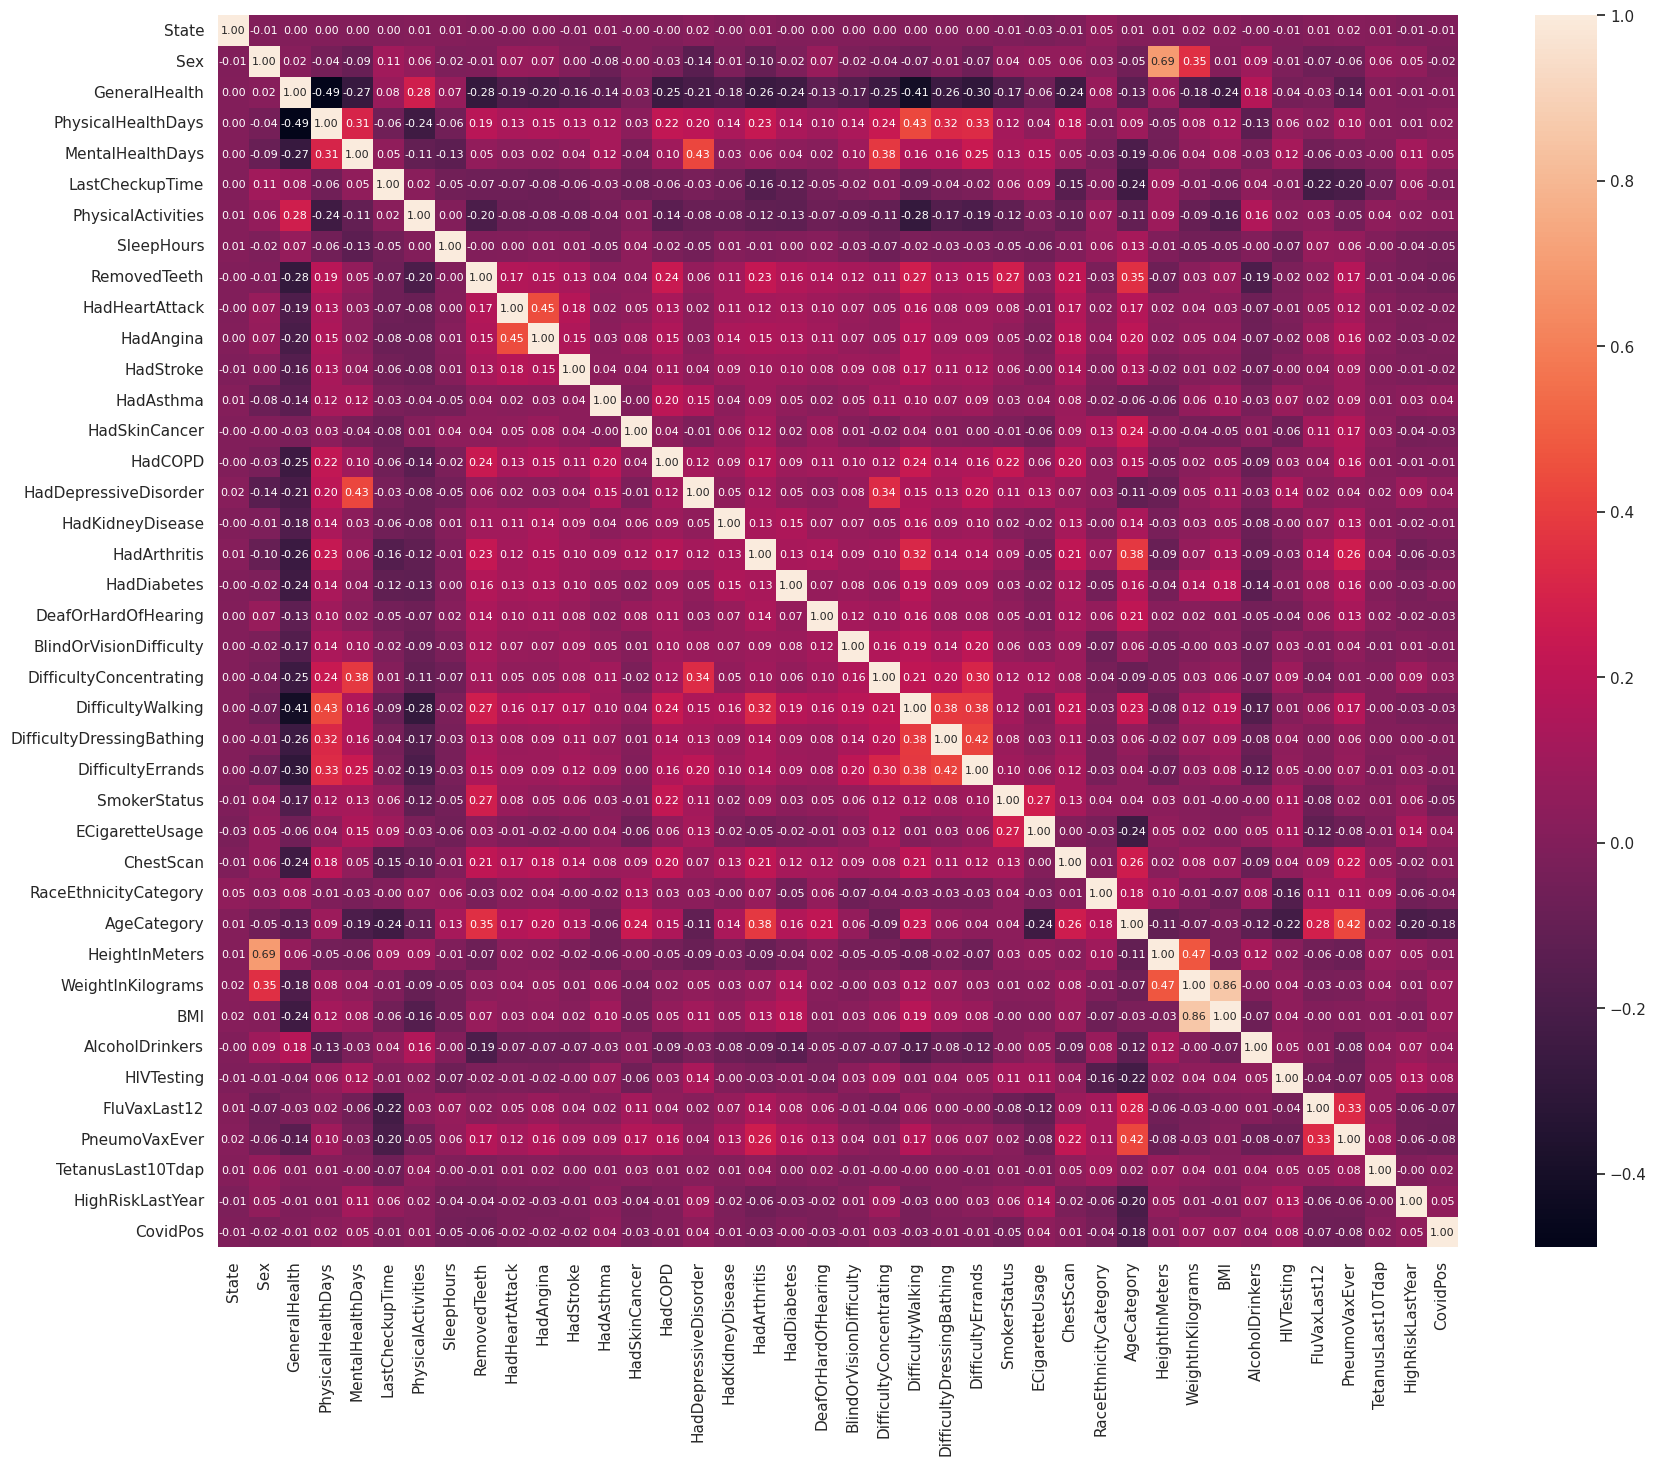

In [ ]:
sns.heatmap(
    df_heart.corr(),
    annot=True,
    annot_kws={"fontsize": 8},
    fmt=".2f",
    xticklabels=True,
    yticklabels=True,
);

In [ ]:
#Balancing the dataset
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()

In [ ]:
y_df = df_heart['HadHeartAttack']

In [ ]:
X_df = df_heart.loc[:, df_heart.columns != 'HadHeartAttack']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.2,
    random_state=42,
)

In [ ]:
X_train, y_train = rus.fit_resample(X_train, y_train)
X_test, y_test = rus.fit_resample(X_test, y_test)

In [ ]:
y_train.value_counts()

0.0    186056
1.0    186056
Name: HadHeartAttack, dtype: int64

([<matplotlib.patches.Wedge at 0x7d20fc700940>,
 [Text(6.735557395310444e-17, 1.1, '0.0'),
  Text(-2.0206672185931328e-16, -1.1, '1.0')])

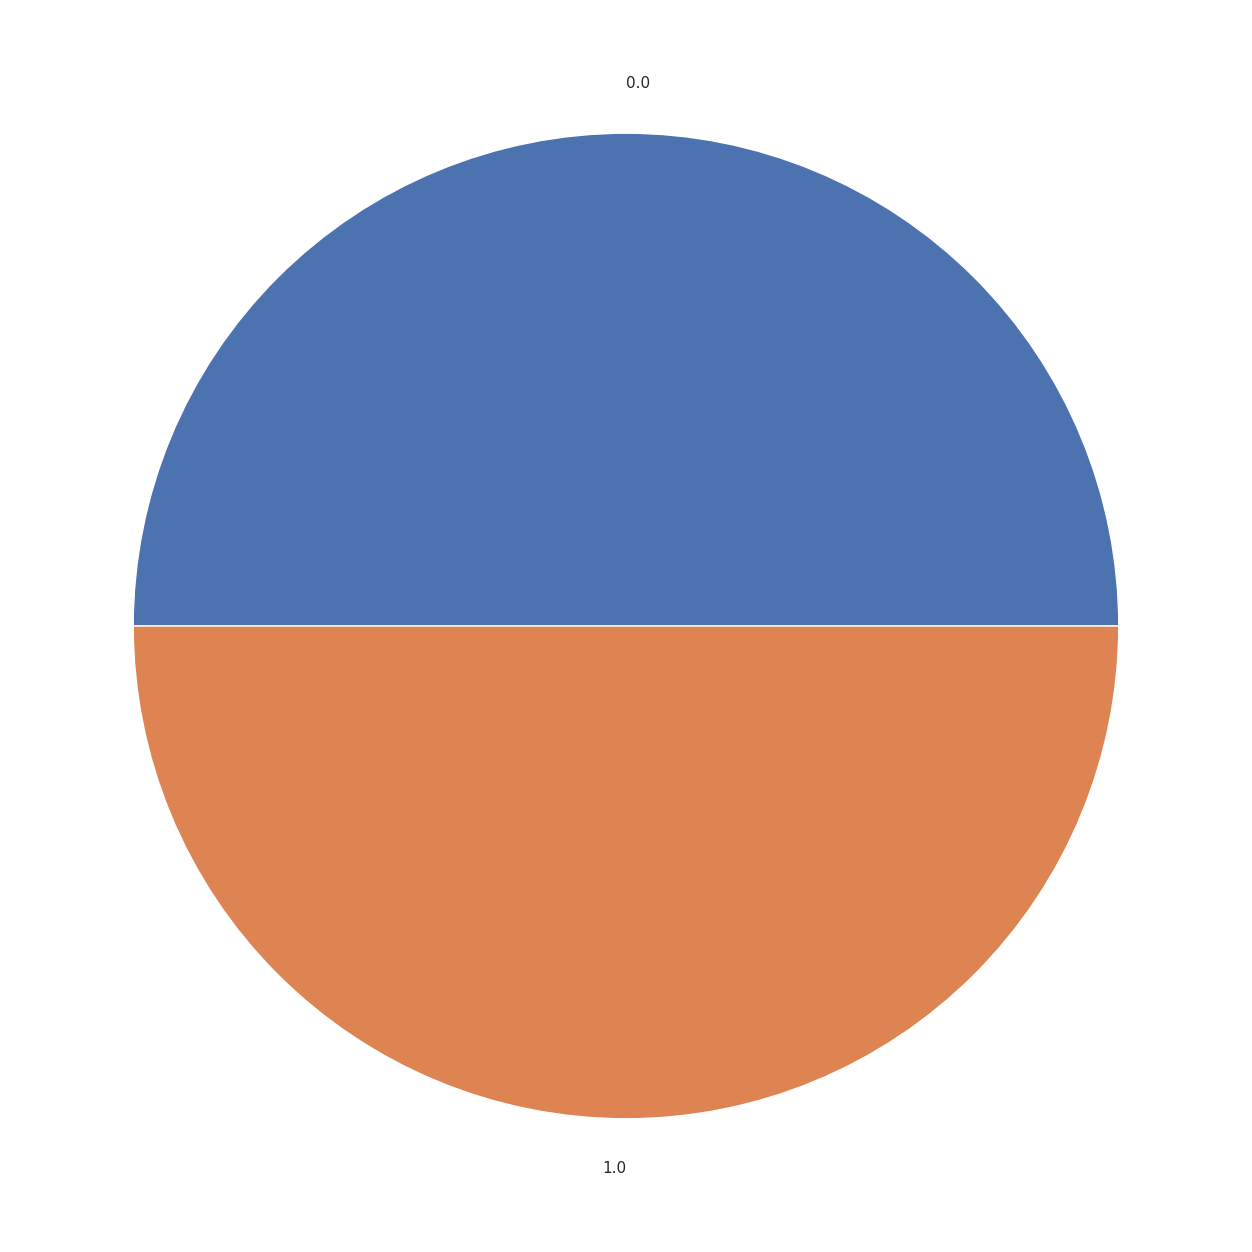

In [ ]:
plt.pie(y_train.value_counts(), labels=pielabel)

In [ ]:
#Now the data is balanced and model is ready to be trained.
import tensorflow as tf

In [ ]:
#Outline model
input_size = 40
output_size = 2
hidden_layer_size = 50


model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(X_train,
         y_train,
         batch_size = batch_size,
         epochs = max_epochs,
         callbacks = [early_stopping],
         validation_data = (X_test, y_test),
         verbose=2)

Epoch 1/100
3722/3722 - 10s - loss: 0.4456 - accuracy: 0.7935 - val_loss: 0.4206 - val_accuracy: 0.7982 - 10s/epoch - 3ms/step
Epoch 2/100
3722/3722 - 7s - loss: 0.4175 - accuracy: 0.8046 - val_loss: 0.4239 - val_accuracy: 0.8014 - 7s/epoch - 2ms/step
Epoch 3/100
3722/3722 - 9s - loss: 0.4123 - accuracy: 0.8083 - val_loss: 0.4290 - val_accuracy: 0.7970 - 9s/epoch - 2ms/step


In [ ]:
#To substantially improve this model, there may be a need to use feature selection methods to select the best variables to use in training the model.

In [ ]:
training_accuracy = print(history.history['accuracy'])

[0.7934600114822388, 0.8046314120292664, 0.8082808256149292]


The previous models done on this project has highest accuracy to be XGB to be 76%. For a CNN classifier, we have 80% which can be increased further with proper feature selection tehniques